# Homework 3
Due by 10/12/15 at 11:59pm EST

-----------





In [4]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image


## Problem 1 Regression (20 pts) 

### Problem 1a 

Compare different models for the regressionP1.txt file where you are to model output given combinations of the x1, x2, and x3 variables and find the best model.  Note that you can include not only the individual variables but the 2- and 3-way interactions that use the format x1:x2 or x1:x2:x3.  How did you determine the best model?


In [11]:
import statsmodels.api as statm

# Read text file into variable data using panda
# StudyNote: read_csv() if has no other args but file path, the read data when display will have \t between columns
# adding sep = '\t' will solve the problem as data = pd.read_csv('regressionP1.txt', sep='\t')
# another way is to use delim_whitespace = true
data = pd.read_csv('regressionP1.txt', delim_whitespace=True)

# ## scatter matrix
# pd.scatter_matrix(data, alpha=0.2, figsize=(14,14), diagonal='kde')

## create two way and three way interaction variable combinations
data['x1*x2'] = data['x1'] * data['x2']
data['x1*x3'] = data['x1'] * data['x3']
data['x2*x3'] = data['x2'] * data['x3']
data['x1*x2*x3'] = data['x1']*data['x2'] * data['x3']

# Extract the output column data into var y
y = data['output']

## Design the x input variables: all individual x and their interactions
x = data[['x1', 'x2', 'x3', 'x1*x2', 'x1*x3', 'x2*x3','x1*x2*x3']]
## Use Odinary Least Square method to build a linear regression model
model = statm.OLS(y, x)
# Analyze the fit result and print the summary
result = model.fit()
print ('The model of taking all individual x and their interactions variables')
print(result.summary())

## Answer determing the best model:
print('\n Analysis: In the coefficient analysis above, we can see that the predictor variables of x1,x2 and x1*x2 are significant',
'because all of their p-values are smaller than 0.05 .x3 and other interaction combinations p-values are greater than',
 "the common alpha level of 0.05, which indicates that they not statistically significant.")
print('\nNext lets remove x3 related variables and leave only x1,x2 and x1*x2 as the features our new model a, and leave x1,x2 as our new',
'the the features of new model b, compare the the fit results of model a and model b. ')


## Model a: Design the x input variables: all individual x and their interactions
xa = data[['x1', 'x2', 'x1*x2']]
## Use Odinary Least Square method to build a linear regression model
model = statm.OLS(y, xa)
# Analyze the fit result and print the summary
result = model.fit()
print ('The model a of taking x1,x2 and x1*x2 as features')
print(result.summary())

## Model b Design the x input variables: all individual x and their interactions
xb = data[['x1', 'x2']]
## Use Odinary Least Square method to build a linear regression model
model = statm.OLS(y, xb)
# Analyze the fit result and print the summary
result = model.fit()
print ('The model b of taking x1,x2 as features')
print(result.summary())


print('\n Answer: Comparing the two models, we see the log-likelyhood of model b is larger than that of model a, the Residuals of ',
     'model a is smaller than model b, therefore model a is a better fit than model b for the training data,'\
     'However the complexity of model a is larger than model b, therefore it might introduces larger variance from model b'\
     'than model a when fit the model for test data, but notice that the AIC, and BIC of model a are smaller than model b, since'\
     ' AIC and BIC already punished model complexity, I choose model a as the best fitting model ')

# import numpy
# print numpy.corrcoef(a,b)

The model of taking all individual x and their interactions variables
                            OLS Regression Results                            
Dep. Variable:                 output   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.203e+04
Date:                Mon, 12 Oct 2015   Prob (F-statistic):          1.60e-293
Time:                        16:09:25   Log-Likelihood:                -504.93
No. Observations:                 214   AIC:                             1024.
Df Residuals:                     207   BIC:                             1047.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------

### Problem 1b
Using the best model from 1a), analyze the regression assumptions.  This should include at least a histogram of the residuals, residuals as a function of the output, and a q-q plot.  

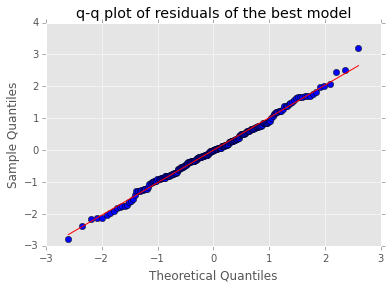


 Analysis: the dots fit very well on the line, and it indicates that the distribution is normal.


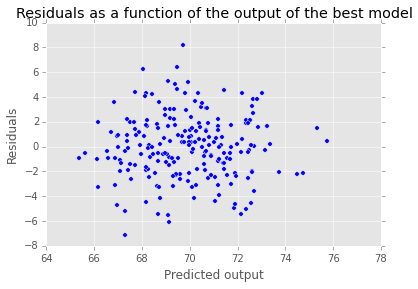


 Analysis: the scattering points of predicted output and residuals are random, this also confirms the assumption.of regression


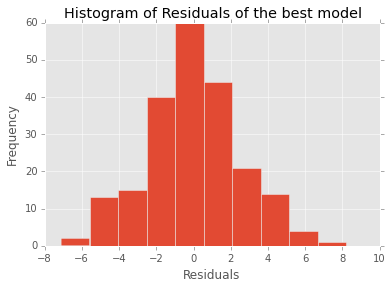


 Analysis: The histogram shows a bell-shaped curve, which confirms the assumption of regression


In [22]:
xb = data[['x1', 'x2','x1*x2']]
model = statm.OLS(y, xb)
result = model.fit()

with plt.style.context('ggplot'):
    
    ## q-q plot
    fig = statm.qqplot(result.resid, fit=True, line='r')
    plt.title('q-q plot of residuals of the best model ')
    plt.show()
    
    print('\n Analysis: the dots fit very well on the line, and it indicates that the distribution is normal.')
    
    ## residuals and predicted output
    plt.scatter(result.predict(), result.resid)
    plt.title('Residuals as a function of the output of the best model')
    plt.xlabel('Predicted output')
    plt.ylabel('Residuals')
    plt.show()
    
    print('\n Analysis: the scattering points of predicted output and residuals are random, this also confirms the assumption.'\
         'of regression')
    
    
    ## histogram of residuals
    plt.hist(result.resid)
    plt.title('Histogram of Residuals of the best model')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
    
    print('\n Analysis: The histogram shows a bell-shaped curve, which confirms the assumption of regression')
    

  

    


## Problem 2  Hierarchical Clustering (15 pts)

A set of data has the following distance matrix.  Use the distance matrix approach to cluster this data by hand or using python calculations.  Produce the following output of the form for a hierarchical clustering using the Centroid based clustering. 

HigherCol     LowerCol     distance


<img src='distmtx.png'>

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage, centroid
import scipy.spatial.distance as ds
    
# define index and condensed distance matrix
Y_index = {0: "A:B", 1: "A:C", 2:"A:D", 3:"A:E", 4: "B:C", 5: "B:D", 6:"B:E", 7: "C:D", 8: "C:E", 9: "D:E"}
Y_distance = np.array([1.1, 2.4, 0.1, 1.5, 1.3, 1, 0.4, 2.3, 0.9, 1.4])
col = ['HigherCol', 'LowerCol', 'distance']
result = pd.DataFrame(columns=col)

# compute distance
def computeDist(i, j, dist_ik, dist_jk, dist_ij):
    ai = i / (i + j)
    aj = j / (j + i)
    b = -(i * j)/(i + j)**2
    return (ai * dist_ik) + (aj * dist_jk) + (b * dist_ij)

#  merge points
def merge(start=0, end=10):
    p = np.argmin(Y_distance[start:end]) + start
    dist = Y_distance[p]
    pair = Y_index[p]
    return {"distance": dist,  "row": pd.DataFrame([[pair[2], pair[0], dist]], columns=col)}

# merge A to D
smallest_p = merge(0)
result = result.append(smallest_p["row"])
dist_ij = smallest_p["distance"]

# update distance matrix
DA_B = computeDist(1, 1, Y_distance[5], Y_distance[0], dist_ij)
DA_C = computeDist(1, 1, Y_distance[7], Y_distance[1], dist_ij)
DA_E = computeDist(1, 1, Y_distance[9], Y_distance[3], dist_ij)
Y_distance[5] = DA_B
Y_distance[7] = DA_C
Y_distance[9] = DA_E

# Merge B to E
smallest_p = merge(4) #exclude A (first 4)
result = result.append(smallest_p["row"])
dist_ij = smallest_p["distance"]

# update distance matrix 
EB_C = calcDist(1, 1, Y_distance[8], Y_distance[4], dist_ij)
EB_DA = calcDist(1, 1, Y_distance[9], Y_distance[6], dist_ij)
Y_distance[8] = EB_C
Y_distance[9] = EB_DA

# Merge D to E
smallest_p = merge(7) 
result = result.append(smallest_p["row"])
dist_ij = smallest_p["distance"]

# update distance matrix
EBDA_C = calcDist(2, 2, Y_distance[8], Y_distance[7], dist_ij)
Y_distance[8] = EBDA_C

# Last Merge
smallest_p = merge(8,9) 
result = result.append(smallest_p["row"])
dist_ij = smallest_p["distance"]

# print result
print(result)


  HigherCol LowerCol  distance
0         D        A  0.100000
0         E        B  0.400000
0         E        D  0.812500
0         E        C  1.459375


## Problem 3  Gradient Search (15 pts)



### Problem 3a  

Use a gradient search approach to find the minimum value of:

f(x,y,z) = (z-3x)4 exp(x-y) + (3x + y + 2z + 7)2exp(y-z)

The gradient of the function is [dx dy dz] defined below. 

dx:	 -12(z-3x)3 exp(x-y) + (z-3x)4 exp(x-y) + 6(3x + y + 2z + 7)exp(y-z)

dy:	(z-3x) 4 exp(x-y)(-1) + 2(3x + y + 2z + 7)exp(y-z) + (3x+y+2z+7)2exp(y-z)

dz:	4(z-3x)3 exp(x-y) + 4(3x + y + 2z + 7)exp(y-z) - (3x + y + 2z + 7)2exp(y-z)

Start at least with [x=-1 y=0 z=1] and explore different learning rates (alpha).  How sensitive is the gradient to the initial starting point?


In [54]:

# Return the current function value
def funcValue(x, y, z):
    f = (((z - (3 * x))**4) * np.exp(x - y)) + \
    ((((3 * x) + y + (2 * z) + 7)**2) * np.exp(y - z))
    return f

# Return the next step point value at gradient direction
def nextStep(x, y, z, alpha):
    
    # Return the derivitiate of current point by x, y, z seperately
    x_grad = ((12 * ((z - (3 * x))**3) * np.exp(x - y)) *(-1))  + \
    (((z - (3 * x))**4) * np.exp(x - y)) + \
    (6 * ((3 * x) + y + (2 * z) + 7) * np.exp(y - z))
    
    y_grad = ((((z - (3 * x))**4) * np.exp(x - y)) * (-1)) + \
    (2 * ((3 * x) + y + (2 * z) + 7) * np.exp(y - z)) + \
    ((((3 * x) + y + (2 * z) + 7)**2) * np.exp(y - z))
    
    z_grad = (4 * ((z - (3 * x))**3) * np.exp(x - y)) + \
    (4 * ((3 * x) + y + (2 * z) + 7) * np.exp(y - z)) - \
    ((((3 * x) + y + (2 * z) + 7)**2) * np.exp(y - z))
    
    x = x - (alpha * x_grad)
    y = y - (alpha * y_grad)
    z = z - (alpha * z_grad)
    return [x, y, z]

# Search in Gradient method, input arguments are x,y,z starting point coordinate, iteration number and alpha value
def GradientSearch(x=-1, y=0, z=1, iterate=1000, alpha=0.01):
    
    #beginning value
    f = funcValue(x, y, z) 
    
    #find new points
    for i in range(iterate):
        x_new, y_new, z_new = nextStep(x, y, z, alpha) 
        
        #calculate new value of function
        new_f = funcValue(x_new, y_new, z_new) 
        
        #check if the new value is smaller than previous
        if f < new_f: 
            print('The minimum value is found:')
            return [x, y, z, f] #return previous points and value
        else: # keep iterating
            f = new_f
            x = x_new
            y = y_new
            z = z_new
            
    print('iteration ends')
    return [x, y, z, f]

### Experiments wit different starting point, alpha and iterations to find the best parameters

## Default parameter using alpha = 0.01, iterations = 1000, Starting point -1,0,1
print("\Default parameter using alpha = 0.01, iterations = 1000, Starting point -1,0,1")
result = GradientSearch(alpha=0.01)
print("x, y, z = " + str(result[0:3]))
print("minimum value = " + str(result[3]))
print("\n Analysis: The minimum point is the exact starting point, which indicates the alpha could be too large")


# Reduce alpha to 0.001
print("\nusing alpha = 0.001,iterations = 10000, Starting point -1,0,1")
result = GradientSearch(alpha=0.001)
print("x, y, z = " + str(result[0:3]))
print("minimum value = " + str(result[3]))
print("\n Analysis: Now with smaller alpha, gradient search is working, next we try to increase iterations")


# Using alpha = 0.001, increase to 10000 iterations
print("\nusing alpha = 0.001, 10000 iterations, Starting point -1,0,1")
result = GradientSearch(iterate=10000, alpha=0.001)
print("x, y, z = " + str(result[0:3]))
print("minimum value = " + str(result[3]))
print("\n Analysis: Now with smaller alpha, gradient search is working, next we try to keep increasing iterations")


# using alpha = 0.001, 100000 iterations
print("\nusing alpha = 0.001, 100000 iterations, Starting point -1,0,1")
result = GradientSearch(iterate=100000, alpha=0.001)
print("x, y, z = " + str(result[0:3]))
print("minimum value = " + str(result[3]))
print("\n Analysis: Now the minimum value is very very small and close to 0 with iterations set to 100000")

# Test sensitivity of starting point, use starting point ,x=-0.9, y=0.1, z=0.9, alpha = 0.001, 100000 iterations
print("\nTest sensitivity of starting point, use starting point ,x=-0.9, y=0.1, z=0.9, alpha = 0.001, 100000 iterations")
result = GradientSearch(x=-0.9, y=0.1, z=0.9,iterate=1000, alpha=0.001)
print("x, y, z = " + str(result[0:3]))
print("minimum value = " + str(result[3]))
print("\n Analysis: The minimum value is closer to the minum value got in default starting point "\
     "as the new starting point is closer to the default starting point")

# using alpha = 0.001, 100000 iterations
print("\Test sensitivity of starting point, use starting point ,x=-5, y=-5, z=5, alpha = 0.001, 100000 iterations")
result = GradientSearch(x=5, y=-5, z=5,iterate=1000, alpha=0.001)
print("x, y, z = " + str(result[0:3]))
print("minimum value = " + str(result[3]))
print("\n Analysis: Now the minimum value is very differente from the one got from default starting point"\
     "the starting point does impact the end result significantly")

print("\n From the above analysis, we can see the final result of gradient search is very sensitive to starting point"\
      " After different experiments, I choose alpah = 0.001, iterations = 100000 as the parameters, and the minimum value"\
      " is very close to 0,and the minimum point is x,y,z = [-0.064, -6.252, -0.185]")


\Default parameter using alpha = 0.01, iterations = 1000, Starting point -1,0,1
The minimum value is found:
x, y, z = [-1, 0, 1]
minimum value = 107.420796822

 Analysis: The minimum point is the exact starting point, which indicates the alpha could be too large

using alpha = 0.001,iterations = 10000, Starting point -1,0,1
iteration ends
x, y, z = [0.26217281980054052, -3.2608332348885365, 0.90208333109311822]
minimum value = 0.629571213064

 Analysis: Now with smaller alpha, gradient search is working, next we try to increase iterations

using alpha = 0.001, 10000 iterations, Starting point -1,0,1
iteration ends
x, y, z = [0.23448742770126701, -5.0767399815238639, 0.73370232418851289]
minimum value = 0.0503897526053

 Analysis: Now with smaller alpha, gradient search is working, next we try to keep increasing iterations

using alpha = 0.001, 100000 iterations, Starting point -1,0,1
iteration ends
x, y, z = [-0.063920205083056014, -6.2522802809879936, -0.18492871398983782]
minimum val

### Problem 3b

An extremely common error in gradient searches is that either the gradient equation or the implementation are wrong.  A quick check is to look at the neighborhood of a given start point.  For the starting point, verify that a point f(x+deltax, y+deltay, z+deltaz) is lower than f(x,y,z) where the  deltax, deltay, and deltaz are small numbers in the appropriate direction of the calculated gradient.

In [57]:
dela = 0.001
x = -1
y = 0
z = 1
x_new = x + dela
y_new = y - dela
z_new = z - dela
f_old = funcValue(x, y, z)
f_new = funcValue(x_new, y_new, z_new)

print('\nStarting value = ' + str(f_old))
print('Value in the gradient direction when move at 0.001 = ' + str(f_new))
print('\nWe see that the value gets smaller so we are sure the gradient search is in appropriate direction.')


Starting value = 107.420796822
Value in the gradient direction when move at 0.001 = 107.232442674

We see that the value gets smaller so we are sure the gradient search is in appropriate direction.


## Problem 4  K-Modes (35 pts)


### Problem 4a  
Write a k-modes algorithm.  We suggest that you find a k-means algorithm available pretty much everywhere and adapt it to perform k-modes for categorical data.   

In [88]:
from scipy.stats import mode
from scipy.spatial.distance import hamming
from matplotlib import colors
import random

def cluster_points(X, L, mu):
    clusters  = {}
    labels = {}
    for j in range(len(X)):
        ## use hamming distance to find nearest cluster
        bestmukey = min([(i[0], np.linalg.norm(hamming(X[j],mu[i[0]]))) for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(X[j])
        except KeyError:
            clusters[bestmukey] = [X[j]]
            
        ## update in labels
        try:
            labels[bestmukey].append(L[j])
        except KeyError:
            labels[bestmukey] = [L[j]]
        
    return (clusters, labels)
 
def reevaluate_centers(mu, clusters):
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        ## use mode instead of mean
        mod = mode(clusters[k], axis=0)
        mod = mod[0][0]
        newmu.append(mod) 
    return newmu
 
def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))
 
def findKModes(X, L, K):
    # Initialize to K random centers
    oldmu = random.sample(X.tolist(), K)
    mu = random.sample(X.tolist(), K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        results = cluster_points(X, L, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, results[0])
    return(mu, results[0], results[1])


### Problem 4b  
Cluster the attached sponge data using your k-modes algorithm.  Recall that the mode is the most frequently occurring pattern in categorical data.  Note that the first column of this data set is a set of labels, not data points.  To show the results, print a list of the output column labels on separate lines.  That is if you find 3 clusters (a,b,c), (d), (e,f), the output should look like

a b c<br/>
d<br/>
e f<br/>


In [89]:
## import data 
file = pd.read_csv('spongeP4.txt', sep='\t', header=None)
# separate label and data
label = file.ix[:,0]
data = file.ix[:,1:]

## Apply label encoder to convert categorical data to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
converted = data.apply(le.fit_transform)

##Store converted data into array
converted = np.array(converted)
label = np.array(label)

## Choose cluster number as 4

k4 = findKModes(converted, label, 4)

## Print out clusters
for key,value in k4[2].items():
    print(key+1,value)
    print("")


1 ['AAPTOS_AAPTOS', 'CLIONA_VIRIDIS', 'OXYCORDYLA_PELLITA', 'SPINULARIA_SPINULARIA', 'STYLOCORDYLA_BOREALIS', 'TENTORIUM_SEMISUBERITES', 'TETHYA_AURANTIUM', 'TETHYA_CITRINA']

2 ['POLYMASTIA_AGGLUTINARIS', 'POLYMASTIA_CORTICATA', 'POLYMASTIA_ECTOFIBROSA', 'POLYMASTIA_GRIMALDI', 'POLYMASTIA_INFLATA', 'POLYMASTIA_INFRAPILOSA', 'POLYMASTIA_LITTORALIS', 'POLYMASTIA_SPINULA', 'POLYMASTIA_TISSIERI', 'POLYMASTIA_UBERRIMA', 'PROTELEIA_SOLLASI', 'QUASILINA_BREVIS', 'QUASILINA_RICHARDII', 'TRICHOSTEMA_HEMISPHAERICUM']

3 ['POLYMASTIA_CONIGERA', 'POLYMASTIA_FUSCA', 'POLYMASTIA_HIRSUTA', 'POLYMASTIA_INVAGINATA', 'POLYMASTIA_MAMMILLARIS', 'POLYMASTIA_MARTAE', 'POLYMASTIA_POLYTYLOTA', 'POLYMASTIA_RADIOSA', 'POLYMASTIA_ROBUSTA', 'POLYMASTIA_TENAX', 'QUASILINA_INTERMEDIA', 'RIDLEYA_OVIFORMIS', 'SPHAEROTYLUS_ANTARCTICUS', 'SPHAEROTYLUS_CAPITATUS', 'SUBERITES_CAMINATUS', 'TENTORIUM_PAPILLATUS', 'TRACHYTELEIA_STEPHENSI', 'TRICHOSTEMA_SARSI', 'TYLEXOCLADUS_JOUBINI', 'WEBERELLA_BURSA', 'WEBERELLA_VERRUCOSA

### Problem 4c
Justify your choice of k

Silhouette analysis can be used to study the separation distance between the resulting clusters.The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually


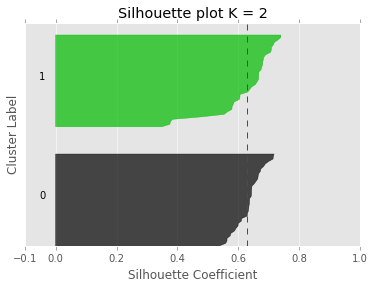

When K = 2, the Silhouette Coefficient = 0.628881365149


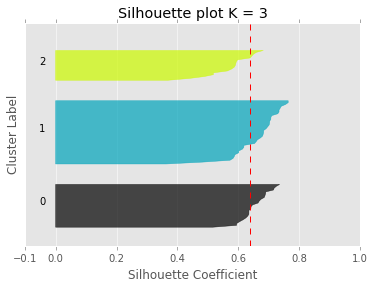

When K = 3, the Silhouette Coefficient = 0.639112088896


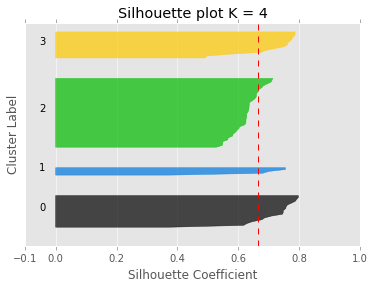

When K = 4, the Silhouette Coefficient = 0.664698410904


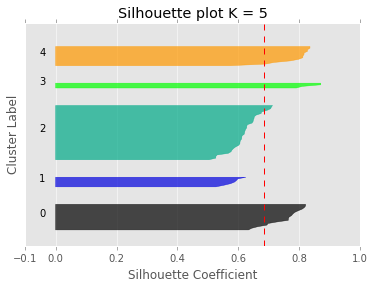

When K = 5, the Silhouette Coefficient = 0.684101963324


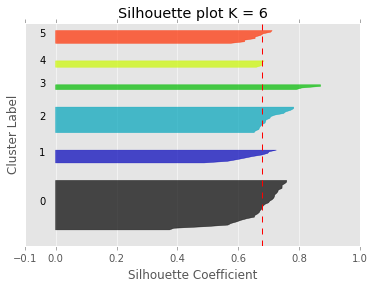

When K = 6, the Silhouette Coefficient = 0.678893256952

Justification: I choose cluster number 4 since the the average Silhouette coefficient is highest and all the cluster's Silhouettecoefficient generally are above the average Silhouette coefficient


In [93]:
print("Silhouette analysis can be used to study the separation distance between the resulting clusters."\
      "The silhouette plot displays a measure of how close each point in one cluster is to points in the "\
      "neighboring clusters and thus provides a way to assess parameters like number of clusters visually")

## function to generate list of silhouettes
def findSilh(clusters_output):
    clusters = clusters_output[0]
    points = clusters_output[1]
    all_silhs = []

    # loop all clusters
    for c in range(len(clusters)):    
        cluster = clusters[c]
        other_clusters = clusters[:c] + clusters[c+1:]
        silhs = [] #create empty list for silhouettes

        # loop all points in clusters
        for i in range(len(points[c])):
            point = points[c][i]
            others = points[c][:i] + points[c][i+1:]         
            sum = 0
            for q in others:
                sum += hamming(point, q)
            a = sum / len(others)
            b_list = []
            for d in other_clusters: #find average hamming distance to each other cluster
                sum = 0
                for q in d:
                    sum += hamming(point, q)
                avg_dist = sum / len(d)
                b_list.append(avg_dist) #add to list
            b = min(b_list) #get the lowest one

            # calculate silhouette
            silh = (b - a) / max(a, b)
            silhs.append(silh) #add to list
        silhs.sort() #sort
        all_silhs.append(silhs) #add to list of all clusters
    return all_silhs

## Generate Silhouette plot
import matplotlib.cm as cm

def plotSilh(s):
    with plt.style.context('ggplot'):
        fig = plt.figure()
        n = len(s)
        y_lower = 10
        silh_avg = np.mean([x for list in s for x in list])
        for i in range(n): 
            cls = s[i]
            size = len(cls)
            y_upper = y_lower + size
            color = cm.spectral(float(i) / n)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cls, facecolor=color, edgecolor=color, alpha=0.7)
            plt.text(-0.05, y_lower + 0.5 * size, str(i))
            y_lower = y_upper + 10

        plt.title('Silhouette plot K = ' + str(n))
        plt.xlabel('Silhouette Coefficient')
        plt.ylabel('Cluster Label')
        plt.axvline(x=silh_avg, color="red", linestyle="--")
        plt.yticks([])  
        plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()
    return "When K = " + str(n) + ", the Silhouette Coefficient = " + str(silh_avg)



s2 = findSilh(findKModes(converted, label, 2))
s3 = findSilh(findKModes(converted, label, 3))
s4 = findSilh(findKModes(converted, label, 4))
s5 = findSilh(findKModes(converted, label, 5))
s6 = findSilh(findKModes(converted, label, 6))
print(plotSilh(s2))
print(plotSilh(s3))
print(plotSilh(s4))
print(plotSilh(s5))
print(plotSilh(s6))


print("\nJustification: I choose cluster number 4 since the the average Silhouette coefficient is highest and all the cluster's Silhouette"\
"coefficient generally are above the average Silhouette coefficient")

## Problem 5 Gaussian Mixture Model (15 pts)

Clustering using K-Means and Gaussian Mixture Models.  Cluster the gmmDataP5.txt file using 4 clusters for each.  You may need to try multiple different starting locations to get a stable result.   We recommend using the the scikit-learn k-Means and mixture GMM for this, although the PyMix from section would be equivalent and acceptable (but needs the older Python 2.7).   How do the results of the clustering compare?    Print the mean and covariances for the GMM, and the centroids for the k-means.
Plotting the raw data points and ellipses for the GMM is useful but optional, but worth a few bonus points.


Centroids of K-Means
[[ 22.11743902  14.08536585]
 [  5.1798       5.8112    ]
 [ 17.75318471  12.40942675]
 [  7.4918543   15.68072848]]
Means of GMM
[[  8.10966431  15.93385639]
 [ 17.02408713  15.04051714]
 [  5.0053854    9.14819776]
 [ 20.12020746  12.09270937]]
Covariance of GMM
[[[  1.82500554   0.21274975]
  [  0.21274975   2.33460323]]

 [[  1.3538413   -1.02292057]
  [ -1.02292057   1.26419041]]

 [[  0.31882917  -0.05966738]
  [ -0.05966738  28.8863442 ]]

 [[  5.90962065   5.69489823]
  [  5.69489823   6.03998683]]]


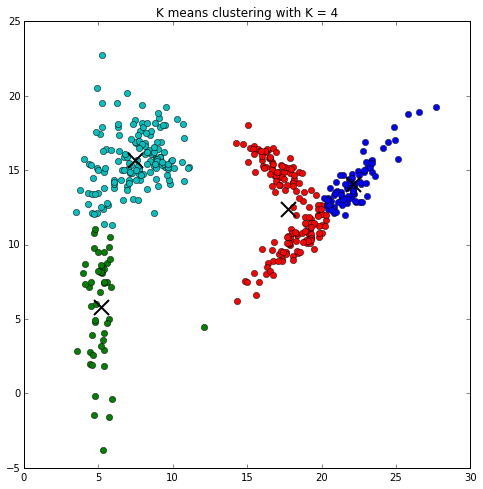

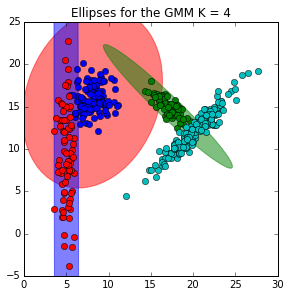


 Analysis: K-Means works better for well round scattered clustering, and it does not fit well for other odd shapeComparing the two clusters, we can see that K-means breaks the left vertical patch into half, breaks the rigth 45 anglelong patch into half as well, while forming an L shape like sky blue colored cluster on the left and a 90 degreerotated T shape red colored cluster, while GMM forms two vertical shape clusters which are in light blue and greem colorthe ellipses are also long shaped


In [109]:
from sklearn.cluster import KMeans
from sklearn.mixture import GMM, DPGMM
import matplotlib as mpl
import itertools
from scipy import linalg

## import data
data = pd.read_csv('gmmDataP5.txt', sep='\t', header=None)
data = np.array(data)
k = 4

## Cluster with K-Means
kmeans = KMeans(init='random', n_clusters=k, n_init=20)
kmeans.fit(data)
klabels = kmeans.labels_
kcentroids = kmeans.cluster_centers_
print("Centroids of K-Means")
print(kcentroids)

# fit GMM with covariance_type = full 
gmm = GMM(n_components=k, n_init=30, covariance_type='full')
gmm.fit(data)
glabels = gmm.predict(data)
gmeans = gmm.means_
gcovar = gmm.covars_
print("Means of GMM")
print(gmeans)
print("Covariance of GMM")
print(gcovar)

## plot K-Means
plt.figure(figsize=(8, 8))
for i in range(k):
    # plot data points
    dplt = data[np.where(klabels==i)]
    plt.plot(dplt[:,0],dplt[:,1],'o')
    
    # plot centroids
    lines = plt.plot(kcentroids[i,0],kcentroids[i,1],'kx')
    plt.setp(lines,ms=15.0)
    plt.setp(lines,mew=2.0)
    plt.title('K means clustering with K = 4')
plt.show()

## Plot ellipses 
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *= 9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)



plt.figure(figsize=(10, 10))
h = plt.subplot(2, k / 2, 1)
make_ellipses(gmm, h)

for i in range(k):
    # plot data points
    dplt = data[np.where(glabels==i)]
    plt.plot(dplt[:,0],dplt[:,1],'o')

plt.title('Ellipses for the GMM K = 4')
plt.show()

print("\n Analysis: K-Means works better for well round scattered clustering, and it does not fit well for other odd shape"\
      "Comparing the two clusters, we can see that K-means breaks the left vertical patch into half, breaks the rigth 45 angle"\
      "long patch into half as well, while forming an L shape like sky blue colored cluster on the left and a 90 degree"\
      "rotated T shape red colored cluster, while GMM forms two vertical shape clusters which are in light blue and greem color"\
      "the ellipses are also long shaped")

### Problem 5 Bonus question:
Write your own implementation of EM algorithm applied to the Gaussian Mixture Models.  Apply it to the same data set.  You do not have to generalize it to N dimensions—2 dimensions is sufficient for this problem if that is easier.  


-2767.38927793


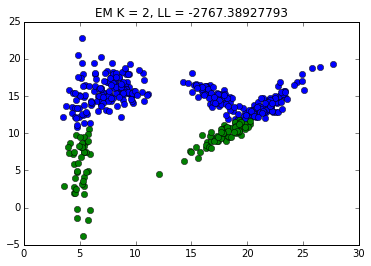

In [108]:
from scipy.stats import multivariate_normal


##  compute Expectation
def expect(data, K, params):
    mu = params[0]
    sigma = params[1]
    pi = params[2]
    rows = len(data) #count obs
    cprob = np.zeros((rows, K)) #set cluster assignment probability matrix 

    # set cluster assignment probability for each datum 
    for x in range(rows):
        for k in range(K):
            cprob[x][k] = pi[k] * multivariate_normal(mu[k], sigma[k]).pdf(data[x]) / denom(data[x], K, mu, sigma, pi)
    return cprob

## Compute Maximization to update parameter
def maximize(data, K, cprob):
    cols = len(data[0]) #features
    rows = len(data) # samples
    mu = np.zeros((K, cols)) # mu matrix 
    sigma = [] #set sigma matrix
    pi = np.zeros(K) #set pi matrix
    total_ric = np.zeros(K) #set total_ric matrix
    total_ricx = np.zeros((K, cols)) #set total ric*x matrix

    # loop for each cluster
    for k in range(K):
        for x in range(rows):
            total_ric += cprob[x][k] #sum ric
            total_ricx[k] += cprob[x][k] * data[x] #sum ric*x
        pi[k] = total_ric[k] / rows #find new pi            
        mu[k] = total_ricx[k] / total_ric[k] #find new mu

        sumsigma = 0
        for x in range(rows):
            x_minus_mu = np.zeros((1, cols)) #set x - mu matrix for each datum
            x_minus_mu = data[x] - mu[k] #find x - mu
            sumsigma += cprob[i][k] * x_minus_mu * x_minus_mu.transpose() #sum of x - mu square
        sigma.append(sumsigma / total_ric[k])
    return [mu, sigma, pi]


# function for sum of Gaussian pdf 
def denom(x, K, mu, sigma, pi):
    sum = 0
    for k in range(K):
        sum += pi[k] * multivariate_normal(mu[k], sigma[k]).pdf(x)
    return sum

# function to calculate log-likelihood 
def loglike(data, K, params):
    mu = params[0]
    sigma = params[1]
    pi = params[2]
    sum = 0
    for x in range(len(data)):
        sum += np.log(denom(data[x], K, mu, sigma, pi))
    return sum 

##  Cluster intialization
def init(data, K):
    cols = len(data[0]) #count features
    rows = len(data) #count obs
    mu = np.zeros((K, cols)) #set mu matrix 
    sigma = []
    pi = np.ones(K) / K

    # loop for each cluster to randomly pick up the point to be mean, mu and sigma of the cluster
    for k in range(K):
        idx = np.random.randint(0, rows) #random the point to be the mean of that cluster
        for col in range(cols):
            mu[k][col] = data[idx][col] #mu
        sigma.append(np.cov(data.transpose())) #sigma

    return [mu, sigma, pi]


## Combine all EM 
def em(data, K):
    params = init(data, K) #initialize parameters
    current_ll = loglike(data, K, params) #find initial log-likelihood
    
    # loop until converge
    iterate = 100
    for i in range(iterate):
        print(current_ll)
        cprob = expect(data, K, params) #expectation
        new_params = maximize(data, K, cprob) #maximization
        new_ll = loglike(data, K, new_params) #find new log-likelihood
        if (abs(new_ll - current_ll) < 100):
       
            break
        else:
            current_ll = new_ll
            params = new_params
    return [current_ll, params[0], params[1], cprob]

## Assign final cluster using last cprob
def label(cprob):
    labels = np.zeros(len(cprob))
    for i in range(len(cprob)):
        if cprob[i][0] < cprob[i][1]:
            labels[i] = 0
        else:
            labels[i] = 1
    return labels
                   
## Run GMM
result = em(data, 2)
labels = label(result[3])

## plot 
K = 2
for i in range(K):

    dataplt = data[np.where(labels==i)]
    plt.plot(dataplt[:,0],dataplt[:,1],'o')
    plt.title("EM K = 2, LL = " + str(result[0]))
plt.show()
